In [3]:
!pip install pmdarima
import pathlib
import datetime
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append("src")
from pandas import read_csv, merge, to_datetime

from src.sales_prediction import ROOT_DIR
from src.sales_prediction.classes.arima.arimaMain import ArimaTraining
from src.sales_prediction.constants.arimaConstants import ArimaModels
from src.sales_prediction.script_internal.transformation import (
    create_day_column,
    summarise_sales_train_validation,
)

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [4]:
def get_pd():
    sales_calendar = read_csv(
        pathlib.Path(
            ROOT_DIR,
            "data",
            "raw",
            "calendar_afcs2023.csv",
        )
    )
    sales_train_validation = read_csv(
        pathlib.Path(
            ROOT_DIR,
            "data",
            "raw",
            "sales_train_validation_afcs2023.csv",
        )
    )
    
    # return sales_train_validation

    # add day variable that is a d_ plus 1 to the end of the calendar
    sales_calendar["date"] = to_datetime(sales_calendar["date"], format="%m/%d/%Y")
    sales_calendar["day"] = create_day_column(sales_calendar)

    # summarise the sales per day by summing the sales of each item
    sales_by_day = summarise_sales_train_validation(sales_train_validation)

    # merge the two dataframes
    sales_byday_with_date = merge(sales_by_day, sales_calendar, on="day")

    # set the index to be the date
    sales_byday_with_date = sales_byday_with_date.set_index(["date"])
    
    return sales_byday_with_date

In [5]:
sales_train_validation = read_csv(
    pathlib.Path(
        ROOT_DIR,
        "data",
        "raw",
        "sales_train_validation_afcs2023.csv",
    )
)

df = sales_train_validation 
# df['mean'] = df.iloc[:, 1:].mean(axis=1)
# df2 = df[['mean', 'id']]
# # df2.to_csv('df2.csv', index=False)
# # sorted(df2['mean'], reverse=True)
# plt.bar(df2['mean'])
# plt.plot()

## Head of dataframe

In [6]:
df = get_pd()
df.head()

,day,sales,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX
date,,,,,,,,,,,,
2011-01-29,d_1,1686,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0
2011-01-30,d_2,1661,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0
2011-01-31,d_3,1189,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0
2011-02-01,d_4,1137,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1
2011-02-02,d_5,954,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,0


/Users/patrickjonathan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/Users/patrickjonathan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


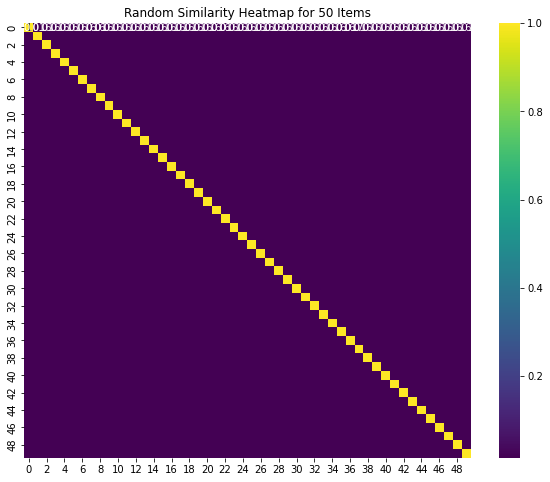

In [56]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform

df = sales_train_validation

# Randomly select a subset of items (e.g., 50 items)
subset_size = 50
random_subset = df.sample(subset_size, random_state=42)

# Extract the relevant data for similarity calculation
subset_data = random_subset.set_index('id').iloc[:, 1:]

# Calculate the percentage change in daily sales
subset_daily_sales_changes = subset_data.transpose().pct_change().fillna(0)

# Replace infinite values with NaN and fill NaN values with zeros
subset_daily_sales_changes.replace([np.inf, -np.inf], np.nan, inplace=True)
subset_daily_sales_changes.fillna(0, inplace=True)

# Standardize the data (normalize)
scaler = StandardScaler()
subset_daily_sales_changes_std = scaler.fit_transform(subset_daily_sales_changes)

# Calculate pairwise Euclidean distances for the subset
pairwise_distances = pdist(subset_daily_sales_changes_std.T, metric='euclidean')

# Convert the pairwise distances to a square matrix
similarity_matrix = 1 / (1 + squareform(pairwise_distances))

# Create a heatmap using seaborn with adjusted color map
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap='viridis')
plt.title('Random Similarity Heatmap for 50 Items')
plt.show()

In [62]:
df = sales_train_validation
df.head()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
id,,,,,,,,,,,,,,,,,,,,,
FOODS_3_001_TX_3_validation,0,2,1,3,0,0,1,0,2,1,...,0,0,0,0,2,0,0,5,2,0
FOODS_3_002_TX_3_validation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FOODS_3_003_TX_3_validation,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,1,0,0
FOODS_3_004_TX_3_validation,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
FOODS_3_005_TX_3_validation,0,1,1,0,0,1,2,0,0,1,...,0,4,2,1,1,0,1,0,4,0


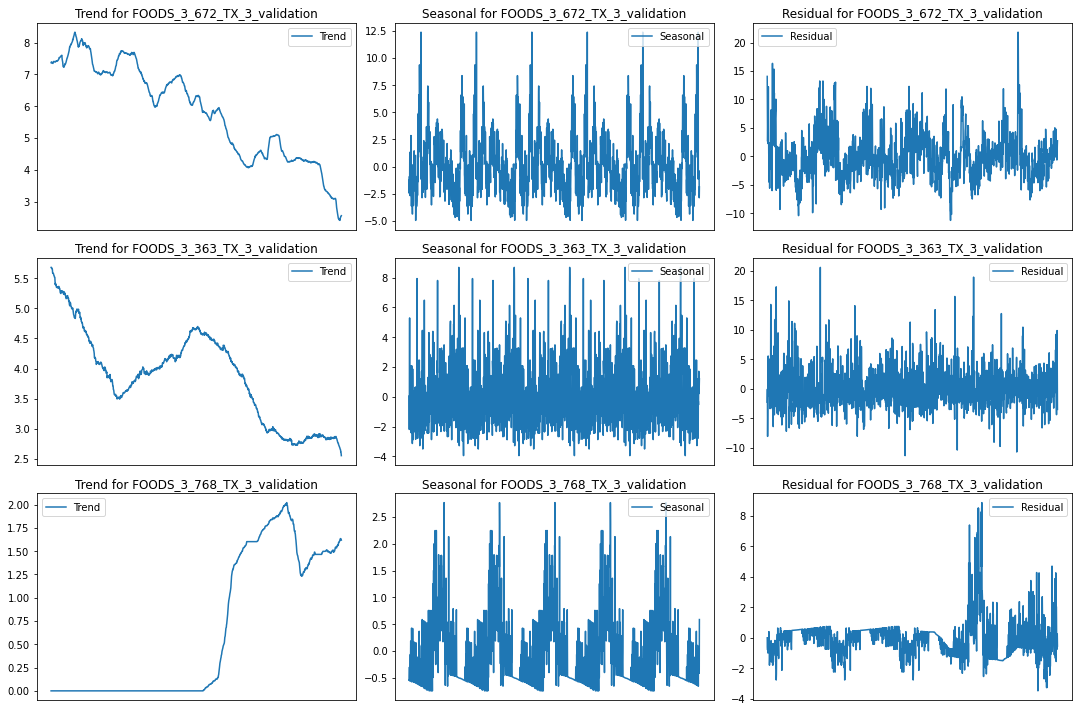

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import random

# Transpose the data to have items as rows and days as columns
sales_data_transposed = df.iloc[:, 1:].T

# Select 3 random items
random_items = random.sample(sales_data_transposed.columns.tolist(), 3)

# Plot the overall trend, seasonal, and residual components for the selected items
plt.figure(figsize=(15, 10))

for item in random_items:
    item_series = sales_data_transposed[item]
    
    # Decompose the time series into trend, seasonal, and residual components
    result = seasonal_decompose(item_series, model='additive', period=365)
    
    # Plot the components
    plt.subplot(3, 3, 3 * random_items.index(item) + 1)
    plt.plot(result.trend, label='Trend')
    plt.title(f'Trend for {item}')
    plt.legend()
    plt.xticks([])

    plt.subplot(3, 3, 3 * random_items.index(item) + 2)
    plt.plot(result.seasonal, label='Seasonal')
    plt.title(f'Seasonal for {item}')
    plt.legend()
    plt.xticks([])

    plt.subplot(3, 3, 3 * random_items.index(item) + 3)
    plt.plot(result.resid, label='Residual')
    plt.title(f'Residual for {item}')
    plt.legend()
    plt.xticks([])

plt.tight_layout()
plt.show()

## Statistics

In [9]:
mean = np.mean(df['sales'])
std = np.std(df['sales'])
var = np.var(df['sales'])

print(f"Mean: {mean}")
print(f"Variance: {var}")
print(f"Standard Deviation: {std}")

Mean: 1566.88761108207
Variance: 116720.55349523401
Standard Deviation: 341.64389866531207


## Plot all train data

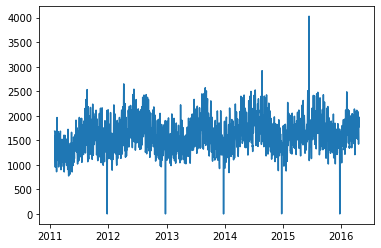

In [7]:
df = get_pd()

plt.plot(df['sales'])
plt.show()

## Plot 2015-2016
This plot shows the sales per day from 04-2015 till 05-2016 with highlighted events that lead to a change in sales that is more than one standard deviation from the mean.

/var/folders/lq/jbrfmdz51qbcss6qvy3ptnrw0000gn/T/ipykernel_7164/2430872600.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['idx'] = df_year.index


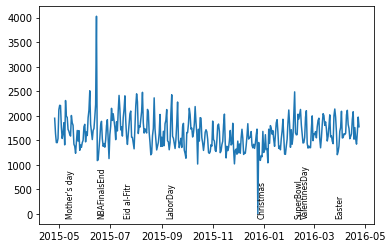

In [10]:
df = get_pd()

fig, ax = plt.subplots()
df_year = df.iloc[-365:]
df_year['idx'] = df_year.index
ax.plot(df_year['sales'])

for index, row in df_year.iterrows():
    if type(row['event_name_1']) != float and (row['sales'] > mean + std or row['sales'] < mean - std):
        ax.text(row['idx'], -50, row['event_name_1'], rotation=90, size=7.5)

## Check stationary

In [11]:
from statsmodels.tsa.stattools import adfuller

# Assuming your time series data is stored in a variable called 'data'
result = adfuller(df['sales'])

# Extracting and printing the test statistic and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -3.1056514747263133
p-value: 0.026137771204151106


In [14]:
# !pip install ydata_profiling
# from ydata_profiling import ProfileReport

# report = ProfileReport(df, title='My Data')
# report.to_file("my_report.html")

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


ImportError: cannot import name 'Buffer' from 'typing_extensions' (/Users/patrickjonathan/opt/anaconda3/lib/python3.9/site-packages/typing_extensions.py)